In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn

In [2]:
!cp -r /kaggle/input/imageclassificationsport/ /kaggle/working

In [3]:
import tarfile
my_tar = tarfile.open('/kaggle/working/imageclassificationsport/data-z3.tar.xz')
my_tar.extractall('/kaggle/working/imageclassificationsport/data/') # specify which folder to extract to
my_tar.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import glob
import os


Analyzujete početnosti v triedach, zobrazte si reprezentanta z triedy

In [6]:
class_name = {}

for filepath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    filename = basename(filepath)
    count = 0
    for path in os.listdir(filepath):
        # check if current path is a file
        if os.path.isfile(os.path.join(filepath, path)):
            count += 1
    class_name[filename] = [count]


In [7]:
class_names = list(class_name.keys())

In [8]:
import pandas as pd
count_df = pd.DataFrame(class_name).transpose()

In [9]:
count_df.columns = ['amount']

count_df.head()

,amount
balance beam,152
roller derby,163
polo,157
wingsuit flying,98
canoe slamon,164


In [10]:
import plotly.express as px

fig = px.bar(count_df, x="amount",title="Amount of classes",template="plotly_dark", height=500)
fig.show()

Analyzujte triedy podľa farebnosti pixelov obrázkov

In [11]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [13]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [14]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (1, 1))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#060506', '#d4c9b7', '#565864', '#282826', '#9b908b']


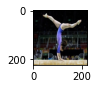

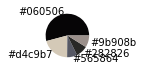

In [15]:
from matplotlib.pyplot import figure
plt.figure(figsize=(1,1))

for dirpath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    count = 0
    for imagepath in glob.iglob(dirpath+'/*'):
        filename = basename(imagepath)
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        modified_image = prep_image(image)
        color_analysis(modified_image)
        break
    break  
            

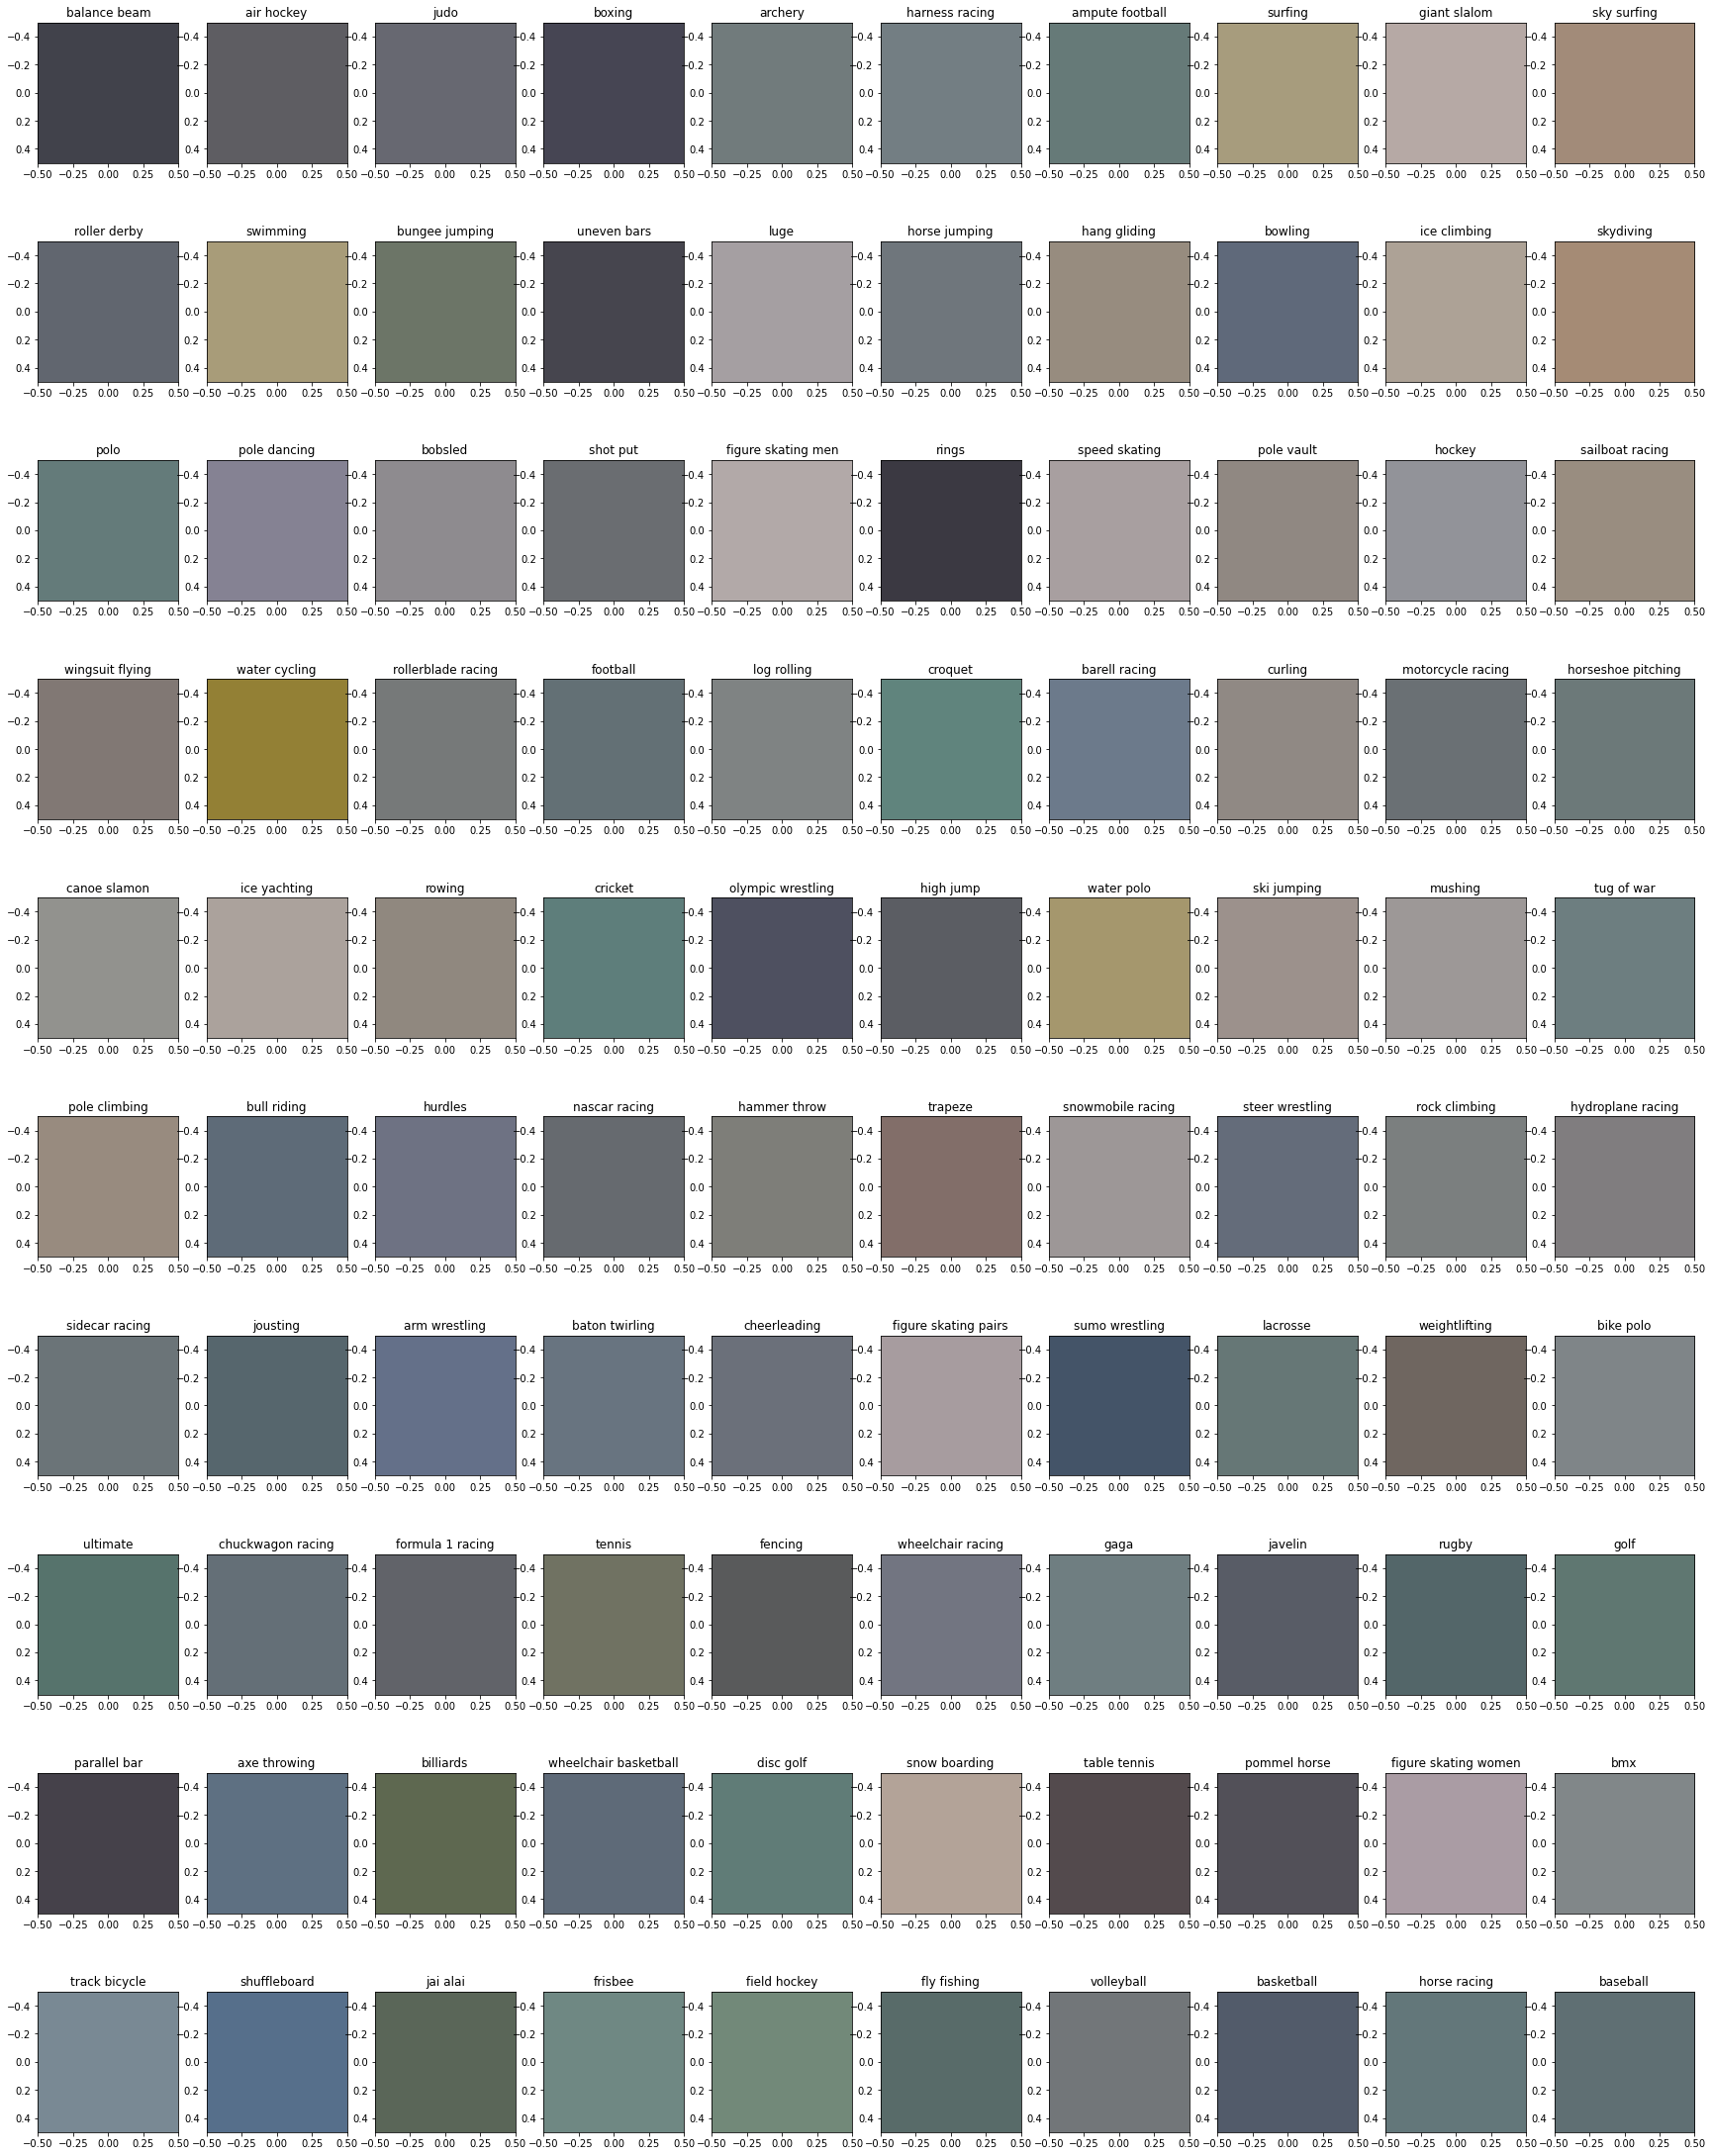

<Figure size 720x720 with 0 Axes>

In [16]:
import cv2
import numpy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(30,40))
j = 0
plt.figure(figsize = (10, 10))
for (i,dirpath) in enumerate(glob.iglob('/kaggle/working/imageclassificationsport/data/train/*')):
    filename = basename(dirpath)
    colors = []
    for imagepath in glob.iglob(dirpath+'/*'):
        myimg = cv2.imread(imagepath)
        colors.append(myimg)    
    averageIm = np.mean(colors, axis=0)
    averageColor = averageIm.mean(axis=(0,1))
    averageColor = numpy.round(averageColor,0)
    averageColor = [int(a) for a in averageColor]
    axis[i%10,j].imshow([[averageColor]])
    axis[i%10,j].set_title(filename)
    if ((i+1)%10 == 0):
        j+=1
    

Analyzujte triedy podľa predpovedí z ľubovoľného modelu natrénovaného na
probléme ImageNet

Správne vytvorte trénovaciu, validačnú a testovaciu množinu, pripravte si generátor dát (odporúčame aj augmentovať množinu), nezabudnite dáta normalizovať a vhodne im zmeniť veľkosť

In [17]:
import cv2

isExist = os.path.exists('/kaggle/working/compress/')
if not isExist:
    os.makedirs('/kaggle/working/compress/')
    
for dat in glob.iglob('/kaggle/working/imageclassificationsport/data/*'):
    dataname = basename(dat)
    isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/')
    if not isExist:
        os.makedirs('/kaggle/working/compress/'+dataname+'/')
    #print(dataname)
    for path in glob.iglob(dat+'/*'):
        pathname = basename(path)
        isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        if not isExist:
            os.makedirs('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        #print(pathname)
        for imgpath in glob.iglob(path+'/*'):
            love = imgpath
            imgname = basename(imgpath)
            img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
            scale_percent = 20 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            #plt.imshow(resized)
            cv2.imwrite("/kaggle/working/compress/"+dataname+"/"+pathname+"/"+imgname, resized)

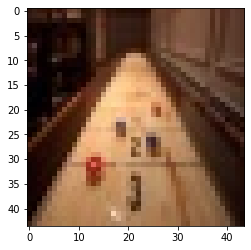

In [18]:
path = '/kaggle/working/compress/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

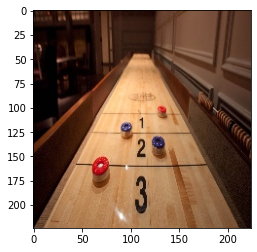

In [19]:
path = '/kaggle/working/imageclassificationsport/data/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
import PIL
from PIL import Image

img = PIL.Image.open("/kaggle/working/compress/test/shuffleboard/5.jpg")
wid, hgt = img.size
print(wid,hgt)

44 44


In [21]:
for dat in glob.iglob('/kaggle/working/compress/test/*'):
    dataname = basename(dat)
    print(dataname)

balance beam
roller derby
polo
wingsuit flying
canoe slamon
pole climbing
sidecar racing
ultimate
parallel bar
track bicycle
air hockey
swimming
pole dancing
water cycling
ice yachting
bull riding
jousting
chuckwagon racing
axe throwing
shuffleboard
judo
bungee jumping
bobsled
rollerblade racing
rowing
hurdles
arm wrestling
formula 1 racing
billiards
jai alai
boxing
uneven bars
shot put
football
cricket
nascar racing
baton twirling
tennis
wheelchair basketball
frisbee
archery
luge
figure skating men
log rolling
olympic wrestling
hammer throw
cheerleading
fencing
disc golf
field hockey
harness racing
horse jumping
rings
croquet
high jump
trapeze
figure skating pairs
wheelchair racing
snow boarding
fly fishing
ampute football
hang gliding
speed skating
barell racing
water polo
snowmobile racing
sumo wrestling
gaga
table tennis
volleyball
surfing
bowling
pole vault
curling
ski jumping
steer wrestling
lacrosse
javelin
pommel horse
basketball
giant slalom
ice climbing
hockey
motorcycle raci

In [22]:
image_size = (wid, hgt)
batch_size = 64

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/valid",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 13572 files belonging to 100 classes.


2022-12-03 09:49:04.234967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 09:49:04.238804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 09:49:04.239566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 09:49:04.241728: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


Zobrazte si reprezentanta z triedy

2022-12-03 09:49:07.132834: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


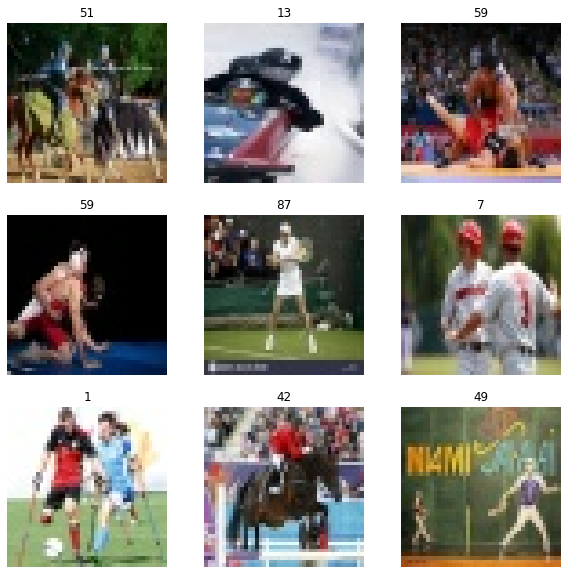

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

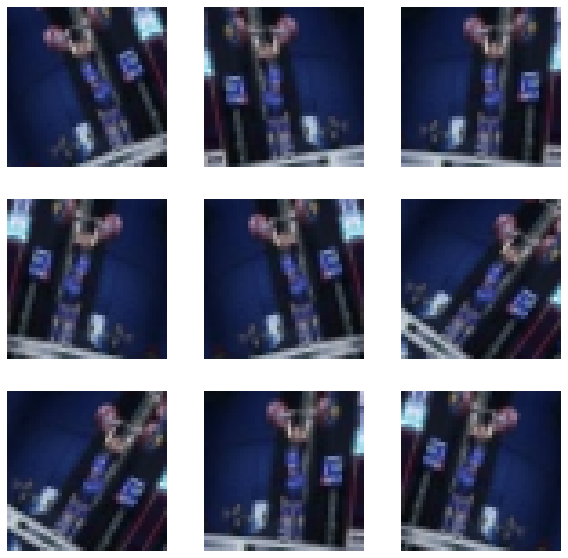

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Navrhnite sieť s aspoň 2 konvolučnými vrstvami. Ak budete sledovať pretrenovanie,
riešte ho regularizáciou. Skúste niekoľko (cielených) konfigurácii hyperparametrov, výsledky zobrazte v tabuľke. Dopracujte sa aspoň ku viditeľnej diagonálena konfúznej matici.

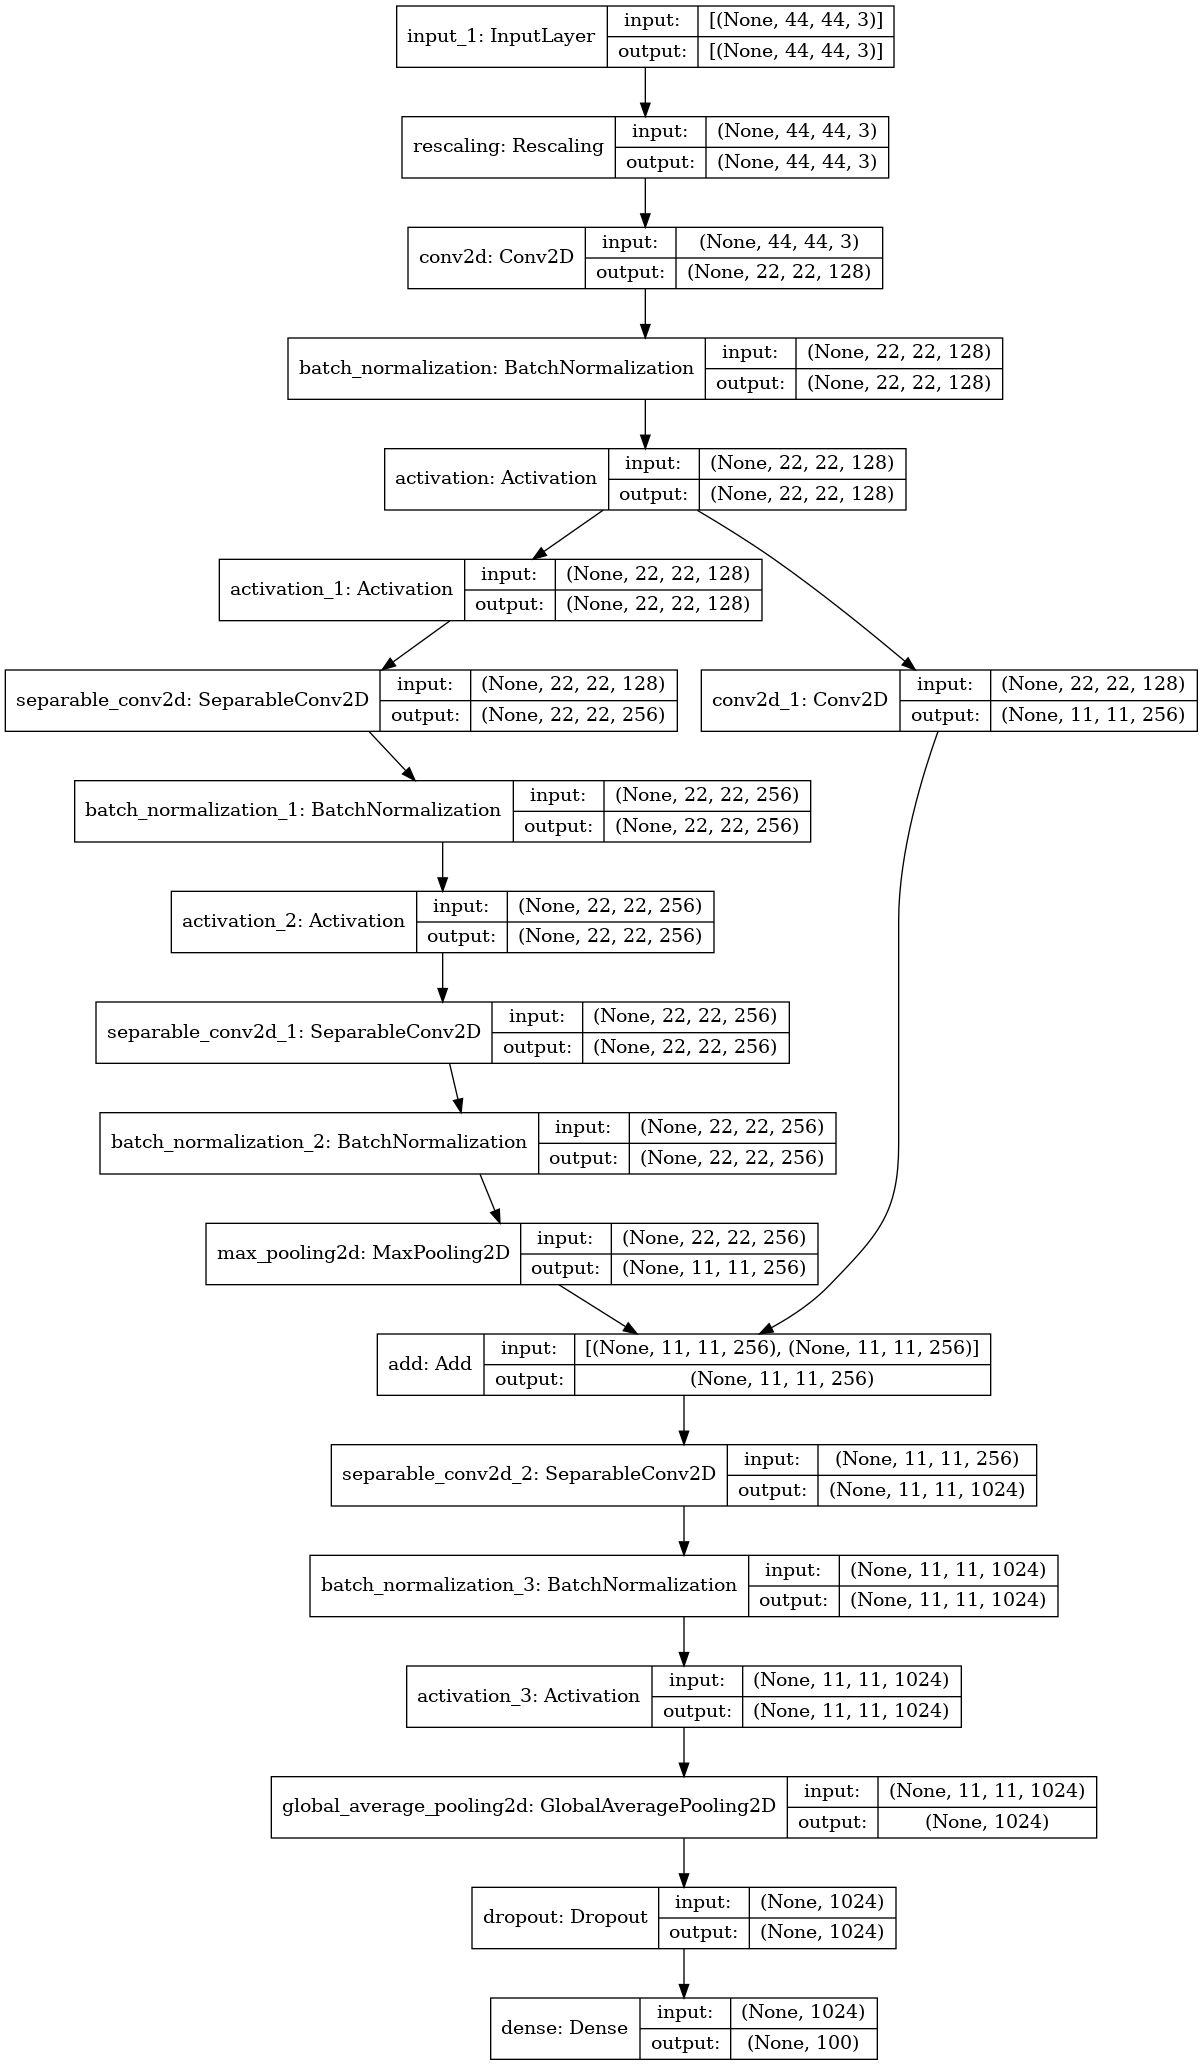

In [27]:
from tensorflow.keras.utils import plot_model

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same",depthwise_regularizer =tf.keras.regularizers.l1( l=0.01))(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same", depthwise_regularizer =tf.keras.regularizers.l1( l=0.01))(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=100)
keras.utils.plot_model(model, show_shapes=True)
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
#import shutil
#shutil.rmtree('/kaggle/working/logs/')

In [29]:
rm -rf /kaggle/working/logs/

In [30]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(30, 30))
  plt.imshow(cm, interpolation='nearest', cmap='magma')
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names,rotation=90)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    #plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [31]:
from datetime import datetime

# Clear out prior logging data.
#!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

2022-12-03 09:49:11.163156: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-03 09:49:11.163198: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-03 09:49:11.165939: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-12-03 09:49:11.526238: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-03 09:49:11.526432: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [32]:
def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

In [33]:
import itertools
import io

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(val_ds)
  test_pred = np.argmax(test_pred_raw, axis=1)
  test_labels = np.concatenate([y for x, y in val_ds], axis=0)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [34]:
epochs = 40

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1),
    keras.callbacks.ModelCheckpoint("best_model{epoch}.keras", monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
    tf.keras.callbacks.TensorBoard(log_dir='/kaggle/working/logs'),
    cm_callback
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

2022-12-03 09:49:11.689031: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-03 09:49:11.689069: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-03 09:49:11.917001: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-03 09:49:11.917173: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 1/40


2022-12-03 09:49:13.835272: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/213 [..............................] - ETA: 25:46 - loss: 26.4408 - accuracy: 0.0000e+00

2022-12-03 09:49:19.537660: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-03 09:49:19.537712: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/213 [..............................] - ETA: 1:44 - loss: 26.3072 - accuracy: 0.0078     

2022-12-03 09:49:20.001630: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-03 09:49:20.002266: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-03 09:49:20.144340: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 241 callback api events and 238 activity events. 
2022-12-03 09:49:20.156830: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-03 09:49:20.178779: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20

2022-12-03 09:49:20.188562: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.trace.json.gz


  9/213 [>.............................] - ETA: 22s - loss: 25.0673 - accuracy: 0.0226

2022-12-03 09:49:20.211269: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20

2022-12-03 09:49:20.214318: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.memory_profile.json.gz
2022-12-03 09:49:20.215164: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20
Dumped tool data for xplane.pb to /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.xplane.pb
Dumped tool data for overview_page.pb to /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.overview_page.pb
Dumped tool data for input_pipeline.pb to /kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.input_pipeline.pb
Dumped tool data for tens

213/213 [==============================] - 13s 28ms/step - loss: 8.6419 - accuracy: 0.0901 - val_loss: 4.8807 - val_accuracy: 0.0100

Epoch 00001: val_loss improved from inf to 4.88066, saving model to best_model1.keras


Cleanup called...


Epoch 2/40
213/213 [==============================] - 5s 23ms/step - loss: 3.7440 - accuracy: 0.1435 - val_loss: 5.2495 - val_accuracy: 0.0100

Epoch 00002: val_loss did not improve from 4.88066


Cleanup called...


Epoch 3/40
213/213 [==============================] - 5s 23ms/step - loss: 3.4947 - accuracy: 0.1863 - val_loss: 5.2347 - val_accuracy: 0.0240

Epoch 00003: val_loss did not improve from 4.88066


Cleanup called...


Epoch 4/40
213/213 [==============================] - 5s 24ms/step - loss: 3.3244 - accuracy: 0.2189 - val_loss: 4.1475 - val_accuracy: 0.1020

Epoch 00004: val_loss improved from 4.88066 to 4.14749, saving model to best_model4.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 5/40
213/213 [==============================] - 6s 26ms/step - loss: 3.2021 - accuracy: 0.2490 - val_loss: 4.7802 - val_accuracy: 0.1320

Epoch 00005: val_loss did not improve from 4.14749


Cleanup called...


Epoch 6/40
213/213 [==============================] - 5s 23ms/step - loss: 3.0924 - accuracy: 0.2695 - val_loss: 4.4430 - val_accuracy: 0.1540

Epoch 00006: val_loss did not improve from 4.14749


Cleanup called...


Epoch 7/40
213/213 [==============================] - 5s 23ms/step - loss: 2.9977 - accuracy: 0.2933 - val_loss: 3.5532 - val_accuracy: 0.2360

Epoch 00007: val_loss improved from 4.14749 to 3.55316, saving model to best_model7.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 8/40
213/213 [==============================] - 5s 23ms/step - loss: 2.8984 - accuracy: 0.3167 - val_loss: 3.1400 - val_accuracy: 0.2760

Epoch 00008: val_loss improved from 3.55316 to 3.14000, saving model to best_model8.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 9/40
213/213 [==============================] - 5s 24ms/step - loss: 2.8161 - accuracy: 0.3344 - val_loss: 3.1740 - val_accuracy: 0.3020

Epoch 00009: val_loss did not improve from 3.14000


Cleanup called...


Epoch 10/40
213/213 [==============================] - 5s 24ms/step - loss: 2.7614 - accuracy: 0.3454 - val_loss: 3.0915 - val_accuracy: 0.2820

Epoch 00010: val_loss improved from 3.14000 to 3.09147, saving model to best_model10.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 11/40
213/213 [==============================] - 5s 24ms/step - loss: 2.7072 - accuracy: 0.3605 - val_loss: 2.7837 - val_accuracy: 0.3520

Epoch 00011: val_loss improved from 3.09147 to 2.78371, saving model to best_model11.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 12/40
213/213 [==============================] - 5s 24ms/step - loss: 2.6266 - accuracy: 0.3706 - val_loss: 3.1113 - val_accuracy: 0.2900

Epoch 00012: val_loss did not improve from 2.78371


Cleanup called...


Epoch 13/40
213/213 [==============================] - 5s 22ms/step - loss: 2.6052 - accuracy: 0.3791 - val_loss: 3.5511 - val_accuracy: 0.2340

Epoch 00013: val_loss did not improve from 2.78371


Cleanup called...


Epoch 14/40
213/213 [==============================] - 5s 23ms/step - loss: 2.5391 - accuracy: 0.3940 - val_loss: 3.0283 - val_accuracy: 0.3080

Epoch 00014: val_loss did not improve from 2.78371


Cleanup called...


Epoch 15/40
213/213 [==============================] - 5s 24ms/step - loss: 2.4863 - accuracy: 0.4086 - val_loss: 2.8219 - val_accuracy: 0.3140

Epoch 00015: val_loss did not improve from 2.78371


Cleanup called...


Epoch 16/40
213/213 [==============================] - 5s 23ms/step - loss: 2.4499 - accuracy: 0.4192 - val_loss: 3.1535 - val_accuracy: 0.3280

Epoch 00016: val_loss did not improve from 2.78371


Cleanup called...


Epoch 17/40
213/213 [==============================] - 5s 23ms/step - loss: 2.4019 - accuracy: 0.4338 - val_loss: 3.0551 - val_accuracy: 0.3220

Epoch 00017: val_loss did not improve from 2.78371


Cleanup called...


Epoch 18/40
213/213 [==============================] - 5s 23ms/step - loss: 2.3649 - accuracy: 0.4306 - val_loss: 3.1892 - val_accuracy: 0.3180

Epoch 00018: val_loss did not improve from 2.78371


Cleanup called...


Epoch 19/40
213/213 [==============================] - 5s 25ms/step - loss: 2.3408 - accuracy: 0.4427 - val_loss: 3.5407 - val_accuracy: 0.2580

Epoch 00019: val_loss did not improve from 2.78371


Cleanup called...


Epoch 20/40
213/213 [==============================] - 5s 23ms/step - loss: 2.3138 - accuracy: 0.4488 - val_loss: 2.9651 - val_accuracy: 0.3400

Epoch 00020: val_loss did not improve from 2.78371


Cleanup called...


Epoch 21/40
213/213 [==============================] - 5s 23ms/step - loss: 2.2608 - accuracy: 0.4631 - val_loss: 2.5662 - val_accuracy: 0.4040

Epoch 00021: val_loss improved from 2.78371 to 2.56618, saving model to best_model21.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 22/40
213/213 [==============================] - 6s 26ms/step - loss: 2.2161 - accuracy: 0.4729 - val_loss: 2.6934 - val_accuracy: 0.3800

Epoch 00022: val_loss did not improve from 2.56618


Cleanup called...


Epoch 23/40
213/213 [==============================] - 5s 23ms/step - loss: 2.2120 - accuracy: 0.4777 - val_loss: 2.8005 - val_accuracy: 0.3360

Epoch 00023: val_loss did not improve from 2.56618


Cleanup called...


Epoch 24/40
213/213 [==============================] - 5s 23ms/step - loss: 2.1745 - accuracy: 0.4839 - val_loss: 2.5914 - val_accuracy: 0.4080

Epoch 00024: val_loss did not improve from 2.56618


Cleanup called...


Epoch 25/40
213/213 [==============================] - 6s 26ms/step - loss: 2.1439 - accuracy: 0.4931 - val_loss: 2.7268 - val_accuracy: 0.3740

Epoch 00025: val_loss did not improve from 2.56618


Cleanup called...


Epoch 26/40
213/213 [==============================] - 5s 24ms/step - loss: 2.1147 - accuracy: 0.4946 - val_loss: 2.7096 - val_accuracy: 0.3580

Epoch 00026: val_loss did not improve from 2.56618


Cleanup called...


Epoch 27/40
213/213 [==============================] - 5s 24ms/step - loss: 2.1009 - accuracy: 0.5035 - val_loss: 2.9718 - val_accuracy: 0.3440

Epoch 00027: val_loss did not improve from 2.56618


Cleanup called...


Epoch 28/40
213/213 [==============================] - 5s 24ms/step - loss: 2.0514 - accuracy: 0.5121 - val_loss: 2.7089 - val_accuracy: 0.4020

Epoch 00028: val_loss did not improve from 2.56618


Cleanup called...


Epoch 29/40
213/213 [==============================] - 5s 24ms/step - loss: 2.0333 - accuracy: 0.5155 - val_loss: 3.1005 - val_accuracy: 0.3460

Epoch 00029: val_loss did not improve from 2.56618


Cleanup called...


Epoch 30/40
213/213 [==============================] - 5s 24ms/step - loss: 2.0041 - accuracy: 0.5223 - val_loss: 2.7950 - val_accuracy: 0.4240

Epoch 00030: val_loss did not improve from 2.56618


Cleanup called...


Epoch 31/40
213/213 [==============================] - 5s 23ms/step - loss: 1.9835 - accuracy: 0.5318 - val_loss: 2.6269 - val_accuracy: 0.4220

Epoch 00031: val_loss did not improve from 2.56618


Cleanup called...


Epoch 32/40
213/213 [==============================] - 5s 25ms/step - loss: 1.9589 - accuracy: 0.5309 - val_loss: 3.2202 - val_accuracy: 0.3380

Epoch 00032: val_loss did not improve from 2.56618


Cleanup called...


Epoch 33/40
213/213 [==============================] - 5s 23ms/step - loss: 1.9440 - accuracy: 0.5407 - val_loss: 3.1368 - val_accuracy: 0.3220

Epoch 00033: val_loss did not improve from 2.56618


Cleanup called...


Epoch 34/40
213/213 [==============================] - 5s 24ms/step - loss: 1.9237 - accuracy: 0.5450 - val_loss: 2.5646 - val_accuracy: 0.4260

Epoch 00034: val_loss improved from 2.56618 to 2.56456, saving model to best_model34.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 35/40
213/213 [==============================] - 5s 25ms/step - loss: 1.9004 - accuracy: 0.5495 - val_loss: 2.9544 - val_accuracy: 0.3280

Epoch 00035: val_loss did not improve from 2.56456


Cleanup called...


Epoch 36/40
213/213 [==============================] - 5s 23ms/step - loss: 1.8761 - accuracy: 0.5582 - val_loss: 2.6103 - val_accuracy: 0.4000

Epoch 00036: val_loss did not improve from 2.56456


Cleanup called...


Epoch 37/40
213/213 [==============================] - 5s 23ms/step - loss: 1.8546 - accuracy: 0.5612 - val_loss: 2.5402 - val_accuracy: 0.4220

Epoch 00037: val_loss improved from 2.56456 to 2.54023, saving model to best_model37.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 38/40
213/213 [==============================] - 5s 24ms/step - loss: 1.8441 - accuracy: 0.5624 - val_loss: 3.3336 - val_accuracy: 0.3020

Epoch 00038: val_loss did not improve from 2.54023


Cleanup called...


Epoch 39/40
213/213 [==============================] - 6s 27ms/step - loss: 1.8362 - accuracy: 0.5670 - val_loss: 2.9463 - val_accuracy: 0.3940

Epoch 00039: val_loss did not improve from 2.54023


Cleanup called...


Epoch 40/40
213/213 [==============================] - 5s 23ms/step - loss: 1.8043 - accuracy: 0.5732 - val_loss: 2.7342 - val_accuracy: 0.3980

Epoch 00040: val_loss did not improve from 2.54023


Cleanup called...


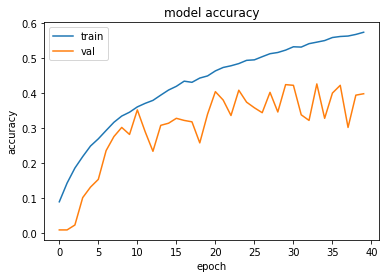

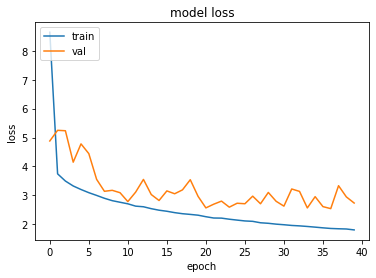

In [35]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
import tensorflow as tf

%load_ext tensorboard

In [37]:
import os

# folder path
dir_path = '/kaggle/working/logs/'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    print(path)

validation
image
train


In [38]:
#tensorboard --logdir /kaggle/working/logs/train --bind_all

In [39]:
!zip -r file.zip /kaggle/working/logs

  adding: kaggle/working/logs/ (stored 0%)
  adding: kaggle/working/logs/validation/ (stored 0%)
  adding: kaggle/working/logs/validation/events.out.tfevents.1670060965.f63c3311dc0a.24.2.v2 (deflated 78%)
  adding: kaggle/working/logs/image/ (stored 0%)
  adding: kaggle/working/logs/image/20221203-094911/ (stored 0%)
  adding: kaggle/working/logs/image/20221203-094911/cm/ (stored 0%)
  adding: kaggle/working/logs/image/20221203-094911/cm/events.out.tfevents.1670060951.f63c3311dc0a.24.0.v2 (deflated 15%)
  adding: kaggle/working/logs/train/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.tensorflow_stats.pb (deflated 68%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_03_09_49_20/f63c3311dc0a.memory_profile.json.gz (stored

In [40]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [43]:
 import plotly.express as px

test_pred_raw = model.predict(test_ds)
test_pred = np.argmax(test_pred_raw, axis=1)
test_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.


fig = px.imshow(cm,width=600, height=600,x=class_names,y=class_names)
fig.show()